# Introduction

The dataset is about a bank's marketing campaign that offers clients a term deposit in the bank. The company approched it's clients mostly by telephon and a target variable was assigned according to the client's answer: 'yes' if they want to make the investment and 'no' otherwise.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits [https://www.investopedia.com/terms/t/termdeposit.asp](http://).

## Table of Contents

1. [Data Loading & Data Cleaning](#1.-Data-Loading-&-Data-Cleaning)
2. [Descriptive Analysis and EDA](#2.-Descriptive-Analysis-and-EDA)
3. [Feature Engineering](#3.-Feature-Engineering)
4. [Classification model](#4.-Classification-model)
6. [Part 2 next week](#Part-2-next-week)


## Input variables:
### bank client data:
1. 1 - age (numeric)
1. 2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
1. 3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
1. 4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
1. 5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
1. 6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
1. 7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### related with the last contact of the current campaign:
1. 8 - contact: contact communication type (categorical: 'cellular', 'telephone')
1. 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
1. 10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
1. 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
1. 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
1. 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
1. 14 - previous: number of contacts performed before this campaign and for this client (numeric)
1. 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

### social and economic context attributes
1. 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
1. 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
1. 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
1. 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
1. 20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
1. 21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [1]:
from IPython.display import Image
from datetime import datetime

# runtime
import timeit

# Data Manipulation
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

np.warnings.filterwarnings('ignore')

# 1. Data Loading & Data Cleaning

In [2]:
bank = pd.read_csv('../input/bank-marketing-campaigns-dataset/bank-additional-full.csv', sep=";")
display(bank.head(3))
print(bank.info())
print(bank.describe())
print(bank.shape)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

All the datatypes are correct. We can convert the dates columns ("month", "day_of_week") for further analysis

Let's begin by taking a look at the nulls. Then, we are going to change the data type of the month and day_of_week columns.

let's see where the nulls are located.

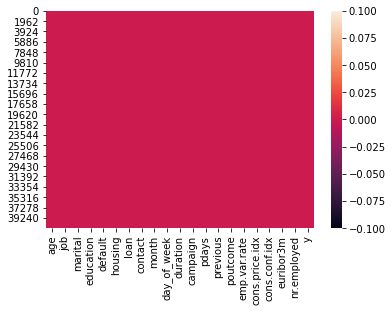

In [3]:
sns.heatmap(bank.isnull())
plt.show()

Thankfully, there aren't any null values in the dataset.

Let's change the datatypes

In [4]:
bank['month'] = pd.to_datetime(bank['month'], format='%b').dt.month
bank['month'].value_counts().index

Int64Index([5, 7, 8, 6, 11, 4, 10, 9, 3, 12], dtype='int64')

In [5]:
print(bank['day_of_week'].value_counts().index)

Index(['thu', 'mon', 'wed', 'tue', 'fri'], dtype='object')


In [6]:
d = {'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5}
bank['day_of_week'] = bank['day_of_week'].map(d)
bank['day_of_week'].value_counts().index

Int64Index([4, 1, 3, 2, 5], dtype='int64')

Changing the names of the month and day of the week will alow us to include this data in our machine learning model

'pdays' has value 999 if the client was not previously contacted, this variable will make our analysis harder to interpret. For this reason, we are going to change this feature to a categorical one, if the value is 999, then it will be replaced with a 'no' which means that the client was not previously contacted, else, it will have a 'yes'

In [7]:
def pcontacted(x):
    if x == 999:
        return 'no'
    else:
        return 'yes'

bank['pdays'] = bank['pdays'].apply(pcontacted)
bank.rename(columns={"pdays": "bcontacted"}, inplace=True)
bank['bcontacted'].value_counts()

no     39673
yes     1515
Name: bcontacted, dtype: int64

# 2. Descriptive Analysis and EDA


## 2.1. Categories
Let's take a look at the categories and how the 'y' is distributed among them.

From the first round, i notice that some features instead of having "null" values, they have "unknow" values, so i'm going to drop them before visualizing the findings

In [8]:
# Drops nulls
def drop(column):

    bank[column].replace('unknown', np.nan, inplace=True)
    bank.dropna(inplace=True)

drop('job')
drop('marital')
drop('education')
drop('housing')



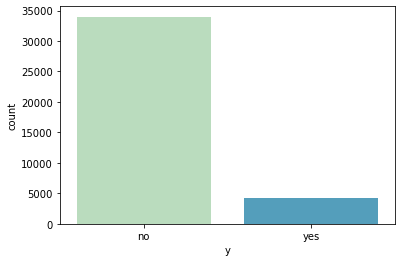

In [9]:
sns.countplot(data=bank, x='y',palette='GnBu')
plt.show()

In [10]:
cat = bank.select_dtypes('object').columns.to_list()
cat = cat[:-1]
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'bcontacted',
 'poutcome']

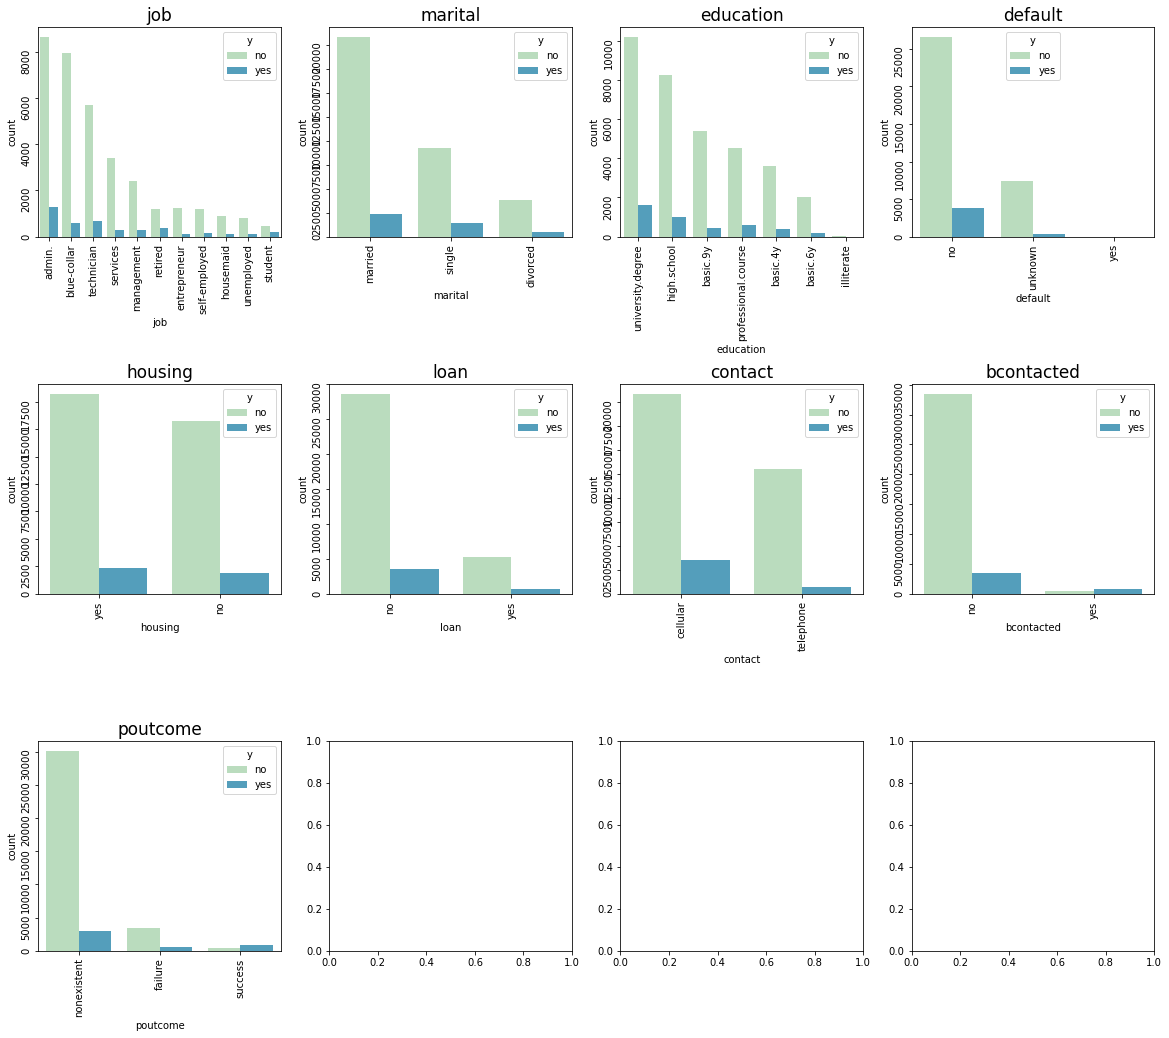

In [11]:
fig, ax = plt.subplots(3,4, figsize=(20,17))

cat = bank.select_dtypes('object').columns.to_list()
cat = cat[:-1]

ax = ax.ravel()
position = 0

for i in cat:
    
    order = bank[i].value_counts().index
    sns.countplot(data=bank, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

- We have a clear imbalanced data problem: the target feature 'y' is dominated by 'no's. When building the classification algorithm we will have to apply an oversampling method to avoid the model predicting based on size.
- All of the features follow the same trend, there is a group that is mostly targeted and then it descends. The proportion of 'yes' and 'no', follow the same pattern as it descends, (around 10% of the sample)
- The value, where 'yes' overcome 'no' is located in the feature  'poutcoume', where if there is a success in previous outcomes, the client will say 'yes' to the marketing campaign. The sample, though is extremely low.
- 'yes' in 'bcontacted' is also bigger in this feature, but the sample is also quite small

## 2.2 Numbers

In [12]:
bank['month'] = bank['month'].astype('str')
bank['day_of_week'] = bank['day_of_week'].astype('str')

numbers = bank.select_dtypes(['int64', 'float64']).columns.to_list()
len(numbers)

9

### 2.2.1 Distribution

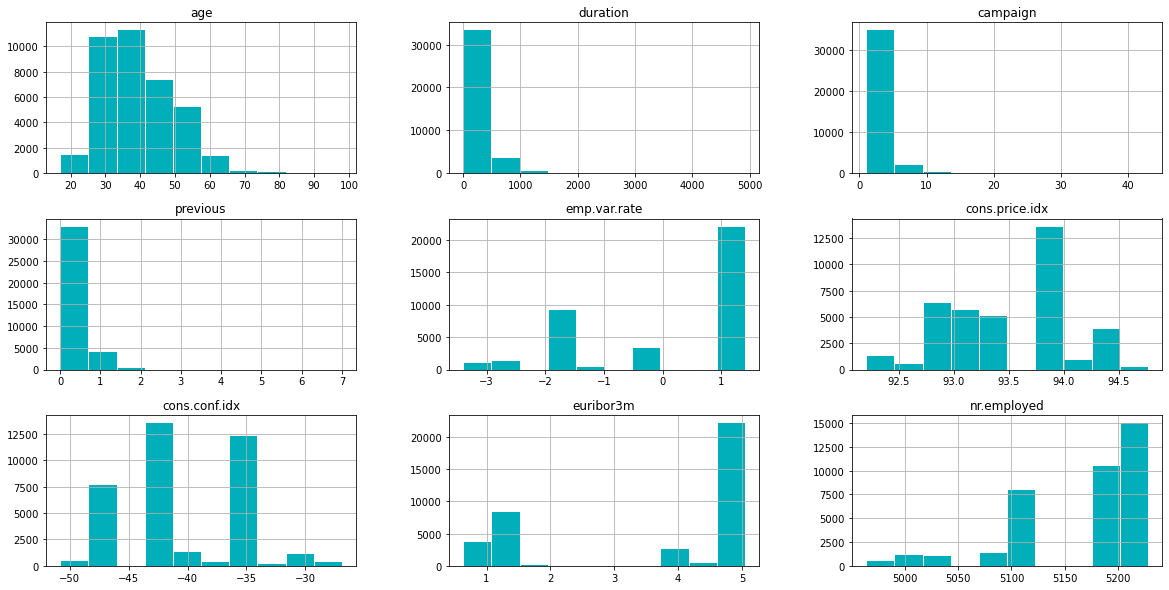

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
bank.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()

display(bank[numbers].describe())

Couple of things could be said about these distributions.

* **age.** The targetted age tend to be between 32 and 47 (interquantile range) which is the most productive age. It also has the most 'normal' distribution, this will be key for our machine learning algorithm
* **duration.** Duration's mean (258.20) drastically differs from the median (180). This is because some high duration calls (outliers) that push the distribution to the right
* **campaign.** clients tend to be contacted two times (median = 2) during the campaign
* **previous.** most of the values are 0. Similarly to the 'pdays' attribute, this means that most of the clients haven't been contated before
* **emp.var.rate** values tend to be between -1.8 and 1.4
* **cons.price.idx.** and **cons.conf.idx** don't vary too much
* **euribor3m.** The clients were contacted usually when the Euribor3 rate was between 1.3 and 4.96 
* social and economic context attributes: 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed' don't show any apparent distribution, my intuition tells me that they won't be that useful for the model, taking also into account that they arenÄt under the control of the bank, but lets leave them there until we finish exploring.

Moreover, we can see that 'duration' and 'campaign' distributions have most the values located in the first bin and then it descends. To make this distributions a bit more useful for our machine learning model, we could transform them with the a log formula to make them more 'normal'. An example below

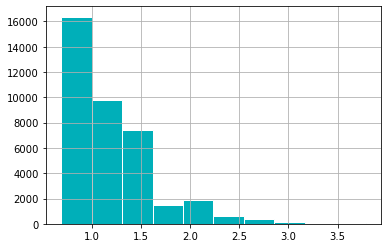

In [14]:
TotalLog = np.log(bank['campaign'] + 1)
TotalLog.hist(edgecolor='white', color='#00afb9')

plt.show()

### 2.2.2 correlations

As mentioned in the introduction, if we want realistic results, we will have to drop 'duration'. Lets do that now.

In [15]:
bank.drop(['duration'], axis=1, inplace=True)
numbers = bank.select_dtypes(['int64', 'float64']).columns.to_list()

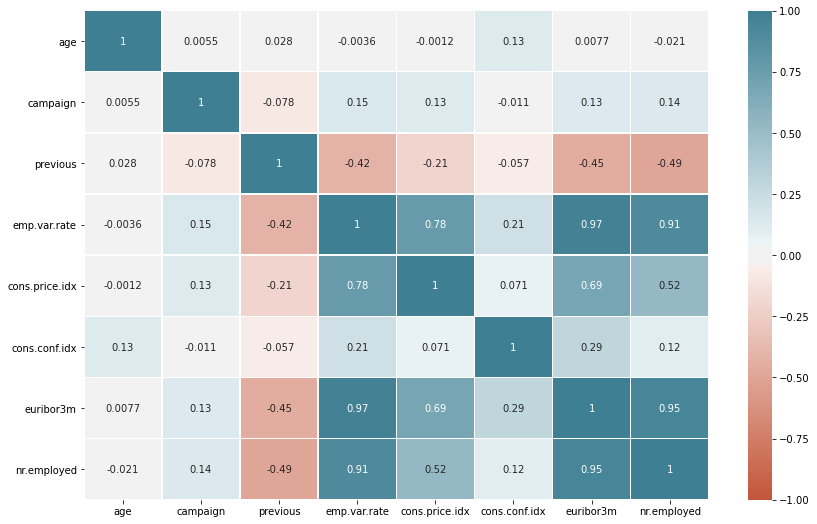

In [16]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(bank[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

* Except from 'previous', the variables that are under the control of the bank ('age' and 'campaign') don't show any high correlation. Thankfully, we don't have any continous target variable that we can apply a regression model to.
* high correlation pairs are not relevant since they are not target variables.

let's take a look at the combinations of the variables with scatter plots and color them with the 'y' column to see if we can find any pattern.

'duration' column is going to be discarted in this part since all '0' values are a 'no' and that include unanswered calls. 

In [17]:
numbers

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

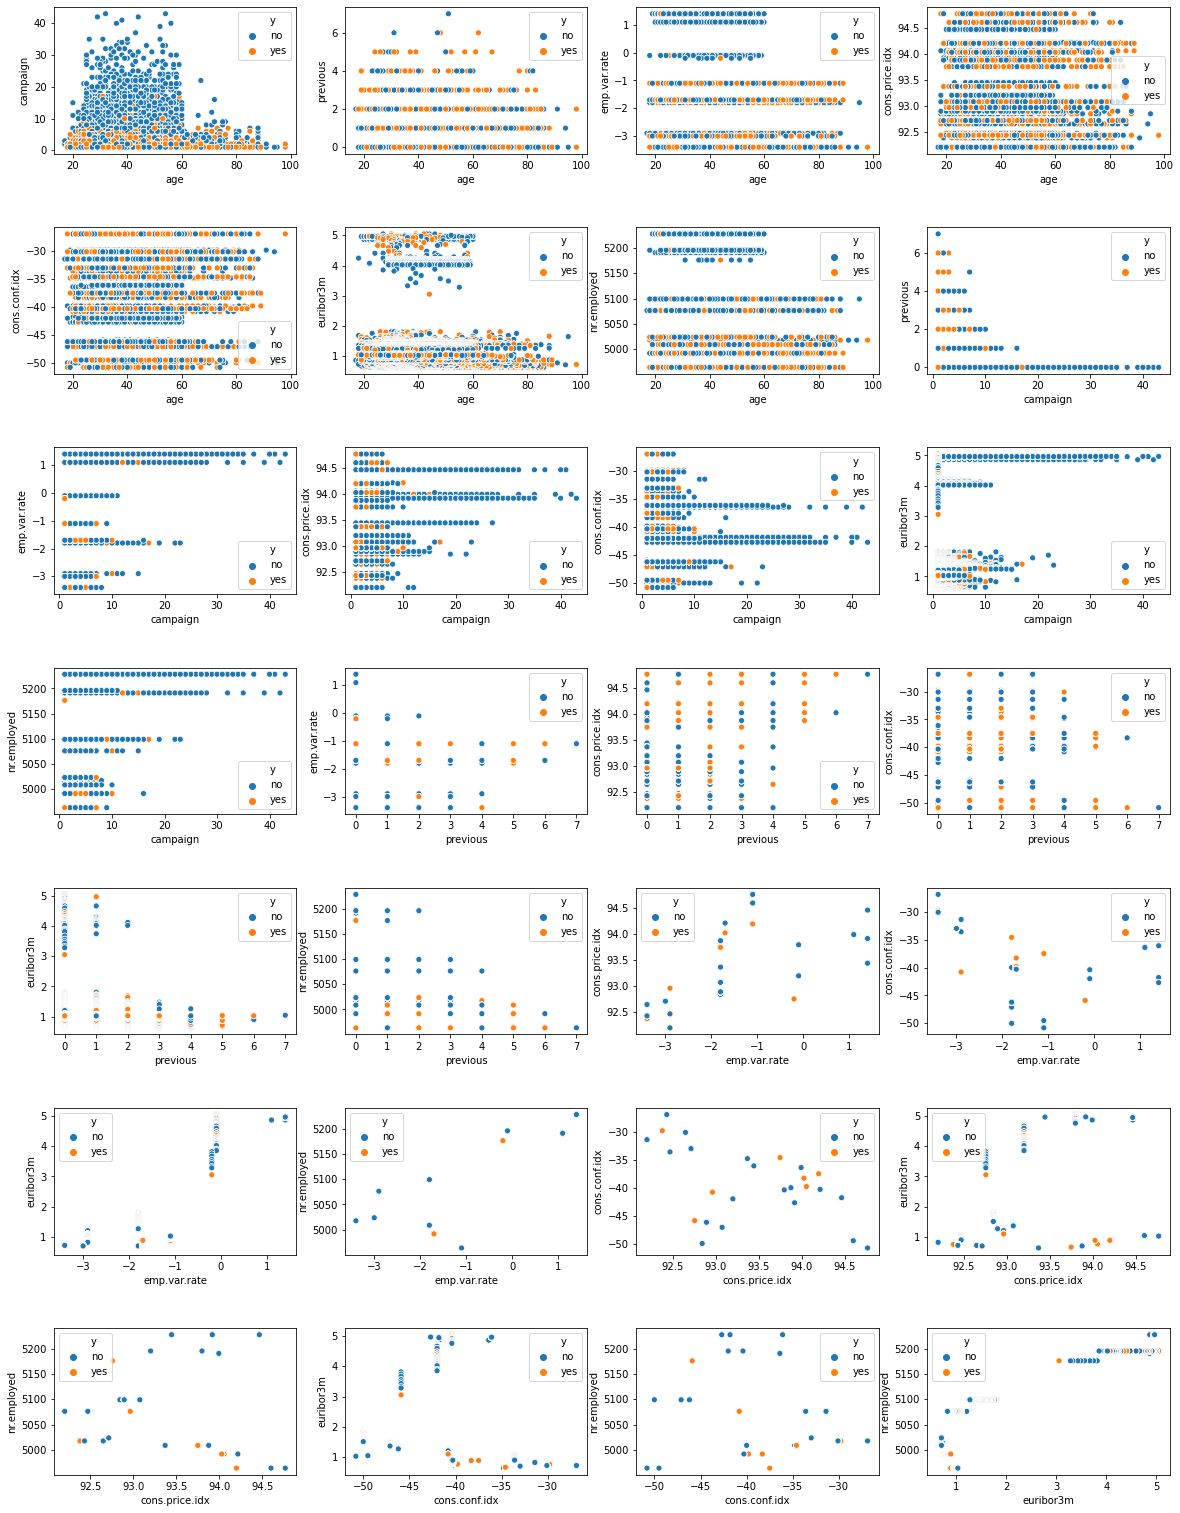

In [18]:
fig, ax = plt.subplots(7,4, figsize=(20,27))
ax = ax.ravel()
position = 0

a = 0
b = 1


while a < len(numbers):
    try:
        sns.scatterplot(x=numbers[a], y=numbers[b], data=bank, hue='y', ax=ax[position])
        position += 1
        if b < len(numbers) - 1:
            b += 1
        else:
            a += 1
            b = a + 1
    except:
        break

plt.subplots_adjust(hspace=0.5)
plt.show()

- I was hoping to find a trend in the age group since that would have helped us create a customer profile but that won't be the case since the graphs don't show any evident trend
- 'campaign's 'yes' are located in  lower values, that means that calling the customer more won't lead to a yes (during the same campaign). But, according to feature 'previous', the customer tend to say 'yes' if he was more than 4 time previously contacted (during different campaigns). This puts in evidence the importance of customer relationship building
- when 'emp.var.rate' is negative, customers tend to say yes. This is a variable outside the control of the bank, but it could be telling us something since it reveals a trend. It should be included in the model
- When 'nr.employed' is less tha 5100, customers tend to say 'yes'
- The remaining relationships don't show any evident trend

## 2.3 Dates

In [19]:
bank['month'] = bank['month'].astype('int')
bank['day_of_week'] = bank['day_of_week'].astype('int')

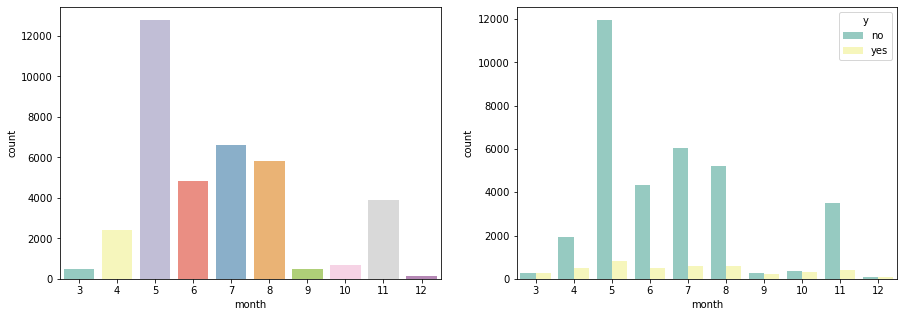

,3,4,5,6,7,8,9,10,11,12
month,497.0,2436.00,12794.00,4846.00,6630.00,5822.00,502.00,659.00,3898.00,161.00
%,1.3,6.37,33.45,12.67,17.34,15.22,1.31,1.72,10.19,0.42
Yes,252.0,486.00,830.00,511.00,599.00,596.00,225.00,297.00,385.00,77.00
%Yes,50.7,19.95,6.49,10.54,9.03,10.24,44.82,45.07,9.88,47.83


In [20]:
#bank['month']
fig, ax = plt.subplots(1,2, figsize=(15,5))

order = bank['month'].value_counts().sort_index().index
sns.countplot(bank['month'], palette='Set3', ax=ax[0])
sns.countplot(bank['month'], data=bank, palette='Set3', ax=ax[1], hue='y')
plt.show()

df = pd.DataFrame(bank['month'].value_counts().sort_index())
df['%'] = np.around(df['month']/df['month'].sum() * 100, 2)
df['Yes'] = bank.groupby(['y','month']).size()['yes'].values
df['%Yes'] = np.around(df['Yes']/df['month']*100,2)
display(df.T)



* Most of the clients were contacted during summer (May-Jul)
* November and October was pretty still until november when it peaked again before Chirstmas and January-February, which don't have any observations. 

## Descriptive Analysis and EDA Conclusions
- Overall, most of the features don't show an evident trend towards 'yes'. The found trends were based mainly on absolute values and not on proportion. The fact that we have imbalanced data doesn't help either.
- Most of the categorical features are distributed around 90% 'no' and 10% 'yes'. 
- **'poutcome'** and **'bcontacted'** are the only features where 'yes' is bigger than 'no' in one of their values. This tells us something important as both are based on previous results and previous contacts. Seems like customer relation plays an important role
- Speaking about numbers, **'campaign'** shows the most evident trend, where 'yes' tends to be located in smaller values.
- Surprisingly, one of the external variables, **'emp.var.rate'** shows a trend where when it's negative, customers tend to say 'yes'



# 3. Feature Engineering
This section will focu on converting the categorical variables itno dummy variables to fit it into the model.

We are also going to be ending with lot's of features, so we are going to apply a reature reduction technique to properly analyze the model

We are also goinf to apply a log formula to 'campaign' to see if we can squeez some additional score values.

## 3.1. Dummies

In [21]:
bank_features = bank.iloc[:,:-1]
bank_features = pd.get_dummies(bank_features)
display(bank_features.head(5))

,age,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,bcontacted_no,bcontacted_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
1,57,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
2,37,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,1,1,0,0,1,0
3,40,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
4,56,5,1,1,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,1,1,0,0,1,0


## 3.2 Model Based Feature Selection
Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. For this case, we are going to use a random forest classifier, since it usually yields good results and because this is a classification task

In [22]:
X = bank_features.values
y = bank['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# determining optimal number of features
n_features = [5, 10, 15, 20, 25, 30, 35, 40, 45]

start = timeit.default_timer()

for i in n_features:
    # Building the model based feature selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    train = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_train_rfe, y_train)
    
    print("Train score: {:.3f}".format(train), "Test score: {:.3f}".format(score), " number of features: {}".format(i))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Train score: 0.875 Test score: 0.953  number of features: 5
Train score: 0.878 Test score: 0.972  number of features: 10
Train score: 0.886 Test score: 0.987  number of features: 15
Train score: 0.888 Test score: 0.991  number of features: 20
Train score: 0.888 Test score: 0.993  number of features: 25
Train score: 0.891 Test score: 0.995  number of features: 30
Train score: 0.889 Test score: 0.995  number of features: 35
Train score: 0.890 Test score: 0.995  number of features: 40
Train score: 0.891 Test score: 0.995  number of features: 45
Time:  633.251412456


With a training score of 0.886 and a test score of 0.991, 20 features is a good enough choiche for me.
Let's check what features the model selects

In [24]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=20)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(20))

features = pd.DataFrame({'features':list(bank_features.keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features

Test score: 0.887  number of features: 20


['age',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_technician',
 'marital_married',
 'marital_single',
 'education_high.school',
 'education_university.degree',
 'housing_yes',
 'loan_no',
 'bcontacted_no',
 'bcontacted_yes']

## Feature Engineering Conclusions

- As found in the EDA section, the model selected features based on majority. Features like:  'job_admin.', 'job_technician', 'marital_married', 'marital_single', 'education_high.school', 'education_university.degree'. This is why an oversampling technique is needed
- We also were right about 'bcontacted', 'campaign', and 'emp.var.rate'. These features, mentioned on the EDA section ended to be important in the feature selection
- 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' were also selected. Seems like the economic situation also plays a role in the model

# 4. Classification model
* in this section we are gong to build a simple model (knn) with the reduced dataset, then a more complex one with the reduced data (Gradient Boosting classifier), and finally another one with the complete dataset and a Gradient Boosting classifier

## 4.1. Knn

In [25]:
X = bank_features[features].values
y = bank['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

best_n = 0
best_training = 0
best_test = 0

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    training = knn.score(X_train, y_train)
    test = knn.score(X_test, y_test)
    
    if test > best_test:
        best_n = i
        best_training = training
        best_test = test

print("best number of neighbors: {}".format(best_n))
print("best training set score : {:.3f}".format(best_training))
print("best test set score: {:.3f}".format(best_test))

best number of neighbors: 10
best training set score : 0.904
best test set score: 0.891


In [26]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("training set score : {:.2f}".format(knn.score(X_train, y_train)))
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start)

training set score : 0.90
test set score: 0.89
Time:  4.529091881999875


## 4.2 Gradient Boosting (Reduced Dataset)

In [27]:
X = bank_features[features].values
y = bank['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start) 

training set score : 0.90
test set score: 0.90
Time:  1.6678594740001245


## 4.3 Gradient Boosting (Complete Dataset)

In [28]:
X = bank_features
y = bank['y'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start = timeit.default_timer()
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1).fit(X_train, y_train)

print("training set score : {:.2f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

stop = timeit.default_timer()
print('Time: ', stop - start) 

training set score : 0.90
test set score: 0.90
Time:  2.0542376789999253


## Classification model Conclusions
- We were able to build a simple Knn modelwith a set score of 0.891. Fairly good but the gradient models were more effective
- We used the reduced dataset and the complete dataset to build the model, obtaining the same results (test score of 0.90). the reduced dataset, thought, run a bit faster (1.72 vs 2.07)

# Part 2 next week
What is missing:
- feature engineering: we found that some values could be improved with log formulas
- imbalanced data: we should apply an oversampling method to get a more realistic result
- Visualize results
- building a ML application. So... will your customer accept your offer?